# Task 1: Q-learning

In [29]:
# Imports 
import gym
import numpy as np
import matplotlib.pyplot as plt
import time 

# Create taxi environment
env = gym.make('Taxi-v3').env
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [30]:
# Hyperparameters
alpha = 0.5   # learning rate
gamma = 0.9   # discount factor
epsilon = 0.99 # exploration rate
num_episodes = 2000  # maximum number of episodes
num_of_steps = 500 # per each episode
hist = [] # evaluation history
debug = False

# Initialize the q-table with zero values
q_table = np.zeros([env.observation_space.n, env.action_space.n])


In [31]:
# Joni's evaluate function
def eval_policy_better(env_, pi_, gamma_, t_max_, episodes_):
    env_.reset()
    v_pi_rep = np.empty(episodes_)
    for e in range(episodes_):
        s_t = env.reset()
        v_pi = 0
        for t in range(t_max_):
            a_t = pi_[s_t]
            s_t, r_t, done, info = env_.step(a_t) 
            v_pi += gamma_*t*r_t
            if done:
                break
        v_pi_rep[e] = v_pi
        env.close()
    return np.mean(v_pi_rep), np.min(v_pi_rep), np.max(v_pi_rep), np.std(v_pi_rep)

In [32]:
# Training function
def training():
    actions = np.array([])
    rewards = np.array([])
    for episode in range(num_episodes):
        # Reset variables for next episode
        state = env.reset()
        done = False
        tot_reward = 0
        # Start new episode and start moving taxi with maximum step limit
        for t in range(num_of_steps):
            # Epsilon-greedy exploitation vs. exploratin
            if np.random.uniform(0, 1) < epsilon:
                action = np.argmax(q_table[state, :]) # exploit
            else:
                action = env.action_space.sample() # Explore 
            
            # Observe next state and reward
            next_state, reward, done, info = env.step(action)
            tot_reward += reward


            # Update Q-table
            q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])
                    
            # Our new state is state
            state = next_state
            
            # Check if terminated
            if done is True: 
                break

        actions = np.append(actions, t)
        rewards = np.append(rewards, tot_reward)

        if episode % 10 == 0 or episode == 1:
            pi = np.argmax(q_table, axis=1)
            val_mean, val_min, val_max, val_std = eval_policy_better(env, pi, gamma, num_of_steps, 100)
            hist.append([episode, val_mean,val_min,val_max,val_std])
            if debug is True:
                print(pi)
                print(val_mean)
                print(episode)

    return actions, rewards

Training started
Training finished.

Average training total reward: -9.103
Average training number of actions 23.235
Maximum training total reward: 15.0
Maximum training number of actions 499.0


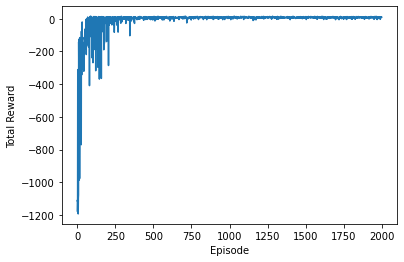

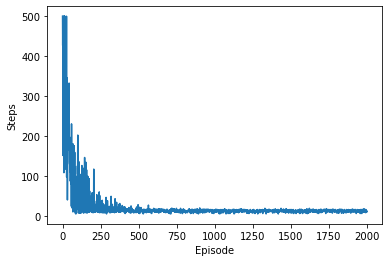

In [33]:
# Q-table training and training reward and action plots
env.reset()

# Train with Q-learning
print('Training started')
actions, rewards = training()
print("Training finished.\n")



######### Run time performance from reward and steps ##########
print("Average training total reward: {}\nAverage training number of actions {}".format(rewards.mean(), actions.mean()))
print("Maximum training total reward: {}\nMaximum training number of actions {}".format(rewards.max(), actions.max()))

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

plt.plot(actions)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.show()

In [36]:
######### Evaluation ###########
# Reset environment
state = env.reset()

# Render it
env.render()
time.sleep(0.5)

actions = np.array([])
rewards = np.array([])

for _ in range(10):
    # Testing
    state = env.reset()
    tot_reward = 0
    for t in range(50):
        action = np.argmax(q_table[state,:])
        state, reward, done, info = env.step(action)
        tot_reward += reward
        env.render()
        print("Action Space {}".format(env.action_space))
        print("State Space {}".format(env.observation_space))
        time.sleep(0.25)
        if done:
            print("Total reward %d" %tot_reward)
            actions = np.append(actions, t)
            rewards = np.append(rewards, tot_reward)
            break


print("Average evaluate total reward: {}\nAverage evaluate number of actions {}".format(rewards.mean(), actions.mean()))
print("Maximum evaluate total reward: {}\nMinimum evaluate number of actions {}".format(rewards.max(), actions.min()))


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Action Space Discrete(6)
State Space Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
Action Space Discrete(6)
State Space Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Action Space Discrete(6)
State Space Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Action Space Discrete(6)
State Space Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Action Space Discrete(6)
State Space Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Action Space Discrete(6)
State Space Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |

(201, 5)


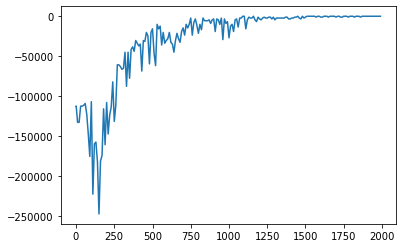

(201, 5)


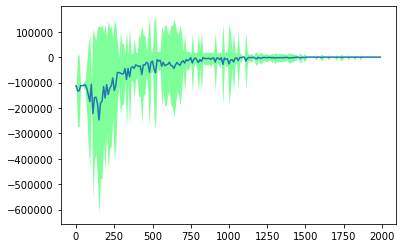

In [35]:
########## Performance histograms ############
hist = np.array(hist)
print(hist.shape)

plt.plot(hist[:,0],hist[:,1])
plt.show()


hist = np.array(hist)
print(hist.shape)

plt.plot(hist[:,0],hist[:,1])
plt.fill_between(hist[:,0], hist[:,1]-hist[:,4],hist[:,1]+hist[:,4],
    alpha=1, edgecolor='#3F7F4C', facecolor='#7EFF99',
    linewidth=0)
plt.show()

# Task 2: Q-network